In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from mpl_toolkits.mplot3d import Axes3D


import sys
sys.path.append("../") 

import LISA as l
import Data as d
import Galactic_Binary as gb

In [20]:
f     = 0.005
fdot  = 1.1112290000e-15 

# These point the source along the -z axis
theta = np.pi
phi   = 0.0

# these are the test values I have been using for a while
# theta = np.pi/2. - (-0.048536)
# phi   = 4.576966 

A     = 5.494741e-23 
iota  = 0.345696 
psi   = 2.997043 
phi0  = 1.584432
fddot = 11./3.*fdot**2/f

T = 1.*l.YEAR

params = np.array([f*T, np.cos(theta), phi, np.log(A), np.cos(iota), psi, phi0, fdot*T**2, fddot*T**3])

In [21]:
orb = l.Orbit(T)
binary = gb.GB(params, orb)

In [22]:
%timeit binary = gb.GB(params, orb)

1000 loops, best of 3: 654 µs per loop


In [12]:
binary.N

16

In [5]:
1./(635.*10**-6)

1574.8031496062995

In [6]:
1./(635.*10**-6)/9.

174.97812773403328

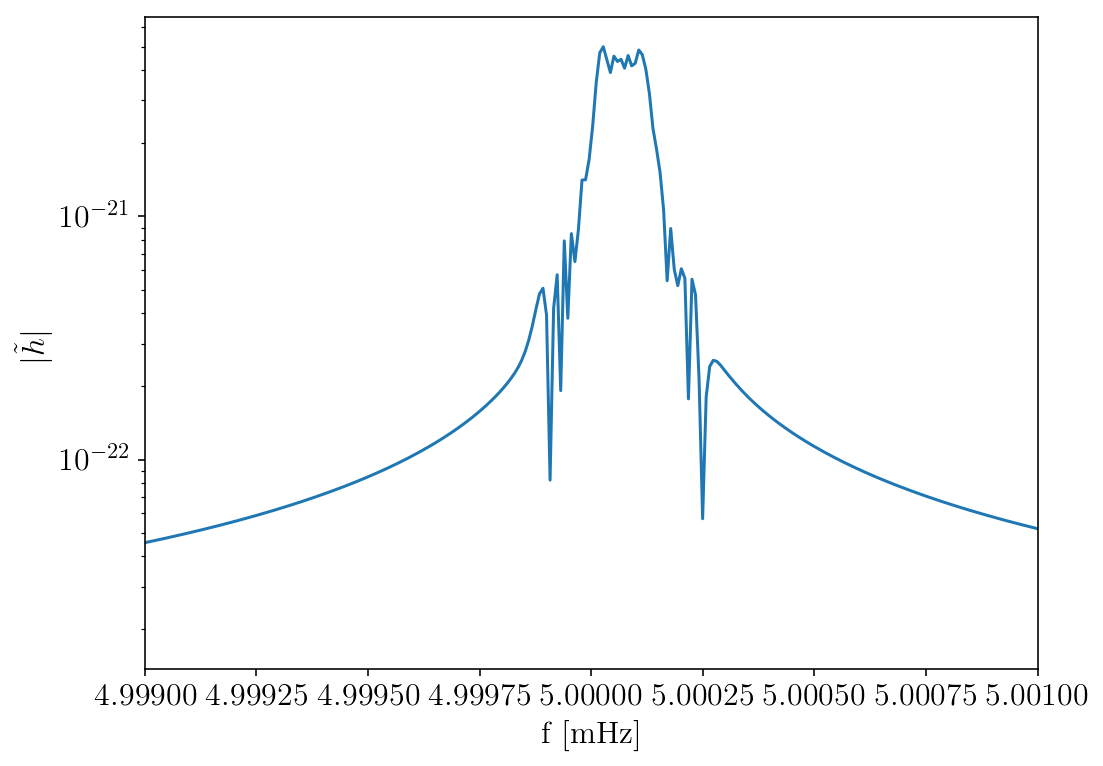

In [19]:
fig, ax = plt.subplots(1, figsize=(8,6))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
ax.set_ylabel(r'$|\tilde{h}|$', fontsize=16)
ax.set_xlabel(r'f [mHz]', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

ax.semilogy(binary.freqs*1000., np.abs(binary.X[:]))

#ax.set_xlim(4.999, 5.001)

plt.show()

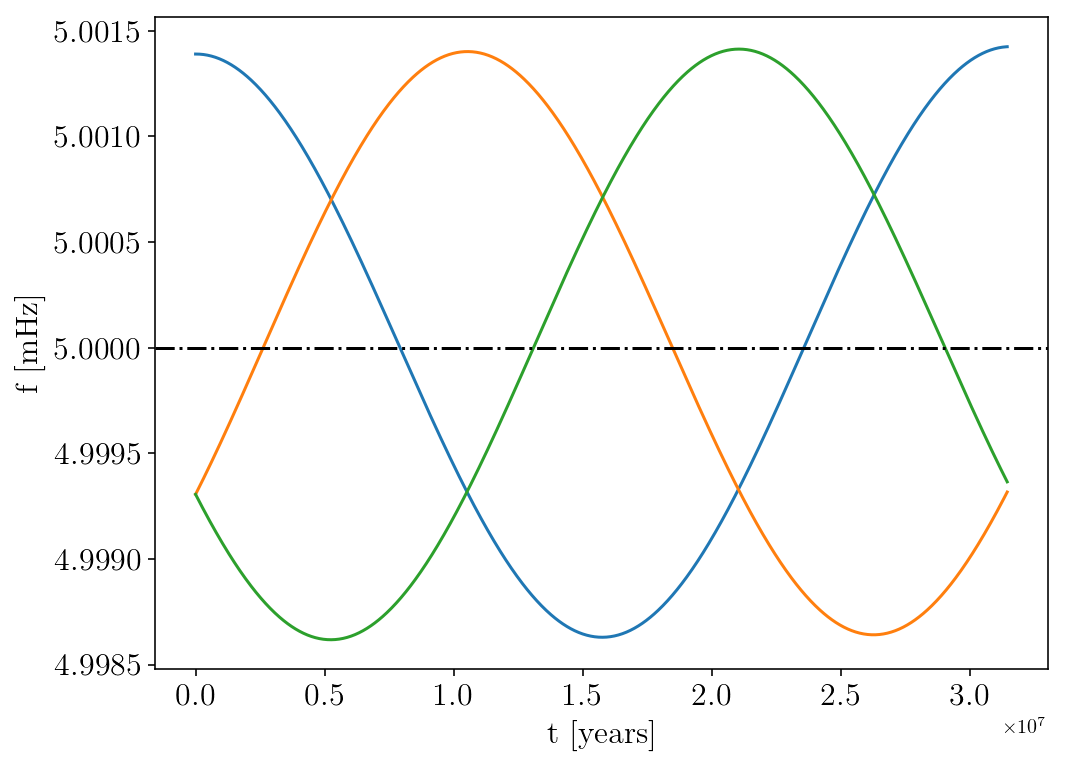

In [26]:
fig, ax = plt.subplots(1, figsize=(8,6))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
ax.set_xlabel(r't [years]', fontsize=16)
ax.set_ylabel(r'f [mHz]', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

ax.plot(binary.t, binary.f_at_SC[0,:]*1000.)
ax.plot(binary.t, binary.f_at_SC[1,:]*1000.)
ax.plot(binary.t, binary.f_at_SC[2,:]*1000.)

ax.axhline(5.0, linestyle='-.', color='k')

plt.show()

N........ 1024


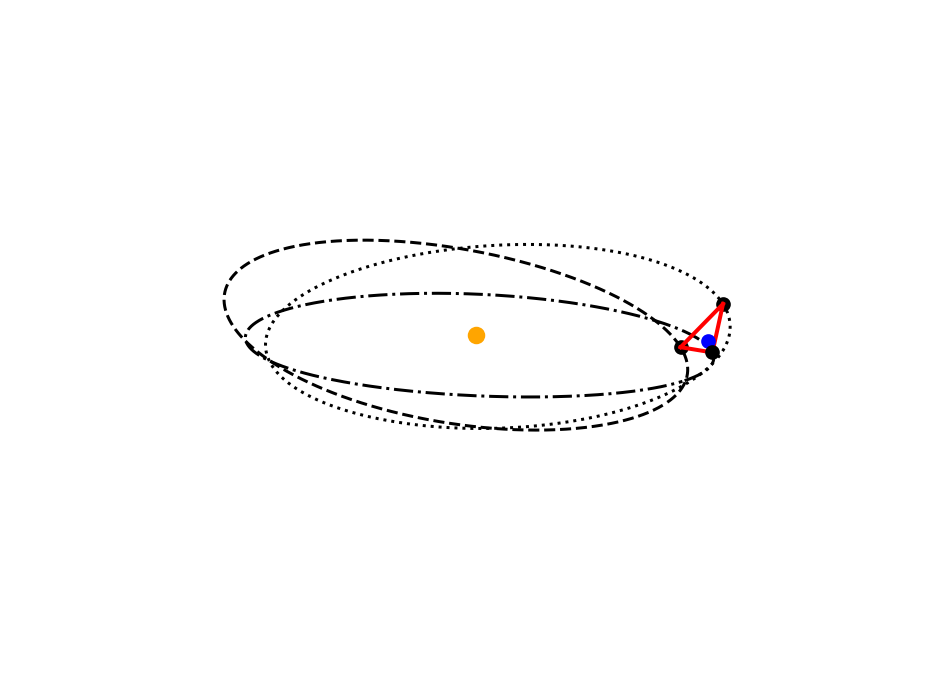

In [13]:
orb = l.Orbit(l.YEAR, ecc=0.1)
binary = gb.GB(params, orb)

# This figure is for testing the implementation of calculating the full orbit 
#     for LISA without loops!
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
ax.set_xlabel(r'x [AU]', fontsize=16)
ax.set_ylabel(r'y [AU]', fontsize=16)
ax.set_zlabel(r'z [AU]', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

# the sun
ax.scatter(0.0, 0.0, 0.0, '.', color='orange', s=60)

x1 = binary.x[0,0]/l.AU
y1 = binary.x[1,0]/l.AU
z1 = binary.x[2,0]/l.AU

x2 = binary.x[0,1]/l.AU
y2 = binary.x[1,1]/l.AU
z2 = binary.x[2,1]/l.AU

x3 = binary.x[0,2]/l.AU
y3 = binary.x[1,2]/l.AU
z3 = binary.x[2,2]/l.AU

ax.plot(x1, y1, z1, '--', color='k')
ax.plot(x2, y2, z2, '-.', color='k')
ax.plot(x3, y3, z3, ':', color='k')

# ax.view_init(elev=30, azim=155.)
ax.set_xlim(-1.0, 1.0)
ax.set_zlim(-1.0, 1.0)
ax.set_zlim(-1.0, 1.0)

ax.xaxis.labelpad = 13
ax.yaxis.labelpad = 13
ax.zaxis.labelpad = 11

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


# # trying to depict the array of lasers
idx=100
a = np.array((x1[idx], x2[idx]))
b = np.array((y1[idx], y2[idx]))
c = np.array((z1[idx], z2[idx]))
ax.plot(a,b,c, '-', linewidth=2, color='r')

a = np.array((x3[idx], x2[idx]))
b = np.array((y3[idx], y2[idx]))
c = np.array((z3[idx], z2[idx]))
ax.plot(a,b,c, '-', linewidth=2, color='r')

ax.scatter(a[1], b[1], c[1], '.', color='k', s=40)

a = np.array((x1[idx], x3[idx]))
b = np.array((y1[idx], y3[idx]))
c = np.array((z1[idx], z3[idx]))
ax.plot(a,b,c, '-', linewidth=2, color='r')

ax.scatter(a[0], b[0], c[0], '.', color='k', s=40)
ax.scatter(a[1], b[1], c[1], '.', color='k', s=40)

xEarth = np.cos(2.*np.pi*binary.t[0]/l.YEAR + 30.*np.pi/180.)
yEarth = np.sin(2.*np.pi*binary.t[0]/l.YEAR + 30.*np.pi/180.)
zEarth = 0.0

ax.scatter(xEarth, yEarth, zEarth, '.', color='blue', s=40)

ax.grid(False)
ax.axis('off')

plt.show()